# Overview

This assignment has a few components and parts as below.

* Shallow vs Deep Network (07a)

* Noise vs non noise input (07a)

* Compute Cross Entropy (07b)

* Explore Stable diffusion and GPT (07c)

I haven't completed the instructions for the assignments. But all the sample outputs are ready as below to give you an idea. Stay tune for more updates!

In [1]:
import torch
import torchvision.transforms as transform
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import datasets
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic=True

# 1. Shallow vs Deep Network

In this assignment we want to see the effect of Shallow vs Deep Networks. Is the Deep Network a magical pill that solves all problems? What type of problems are suitable for Deep Networks? When or How does a Shallow Network be as good as Deep Networks? These are the questions that we will be pondering upon.

### 1.1 Design a few shallow and deep networks. Examples are below.
Below is shown some incomplete code on shallow vs deep vs deeper networks that I have experimented with. You don't have to do exactly the same. But you must compare a few shallow vs deep networks


In [2]:
class ShallowNN(nn.Module):
  def __init__(self,input_size, hidden_size,num_classes):
    super(ShallowNN,self).__init__()
    self.input_layer = nn.Linear(input_size, hidden_size)
    self.hid_layer1 = nn.Linear(hidden_size, num_classes)

    # defining layers as attributes
    self.layer_in = None
    self.act = None

  def forward(self,x): 
    self.layer_in = self.input_layer(x)
    
    self.act = F.tanh(self.layer_in)
    y_pred = F.leaky_relu(self.hid_layer1(self.act))
    
    return y_pred


class DeepNN(nn.Module):
  def __init__(self,input_size, hidden_size1,hidden_size2,num_classes):
    super(DeepNN,self).__init__()
    self.input_layer = nn.Linear(input_size, hidden_size1)
    self.hid_layer1 = nn.Linear(hidden_size1, hidden_size2)
    self.hid_layer2 = nn.Linear(hidden_size2, num_classes)
    
    # defining layers as attributes
    self.layer_in = None
    self.act1 = None
    self.act2 = None

  def forward(self,x):
    self.layer_in = self.input_layer(x)
    
    self.act1 = F.leaky_relu(self.layer_in)
    self.act2 = F.tanh(self.hid_layer1(self.act1))
    y_pred = F.leaky_relu(self.hid_layer2(self.act2))
    
    return y_pred


class DeeperNN(nn.Module):
  def __init__(self,input_size, hidden_size1,hidden_size2,hidden_size3,hidden_size4,hidden_size5,num_classes):
    super(DeeperNN,self).__init__()
    self.input_layer = nn.Linear(input_size, hidden_size1)
    self.hid_layer1 = nn.Linear(hidden_size1, hidden_size2)
    self.hid_layer2 = nn.Linear(hidden_size2, hidden_size3)
    self.hid_layer3 = nn.Linear(hidden_size3, hidden_size4)
    self.hid_layer4 = nn.Linear(hidden_size4, hidden_size5)
    self.hid_layer5 = nn.Linear(hidden_size5, num_classes)
    
    # defining layers as attributes
    self.layer_in = None
    self.act1 = None
    self.act2 = None
    self.act3 = None
    self.act4 = None
    self.act5 = None
    
  def forward(self,x): 
    self.layer_in = self.input_layer(x)
    
    self.act1 = F.tanh(self.layer_in)
    self.act2 = F.leaky_relu(self.hid_layer1(self.act1))
    self.act3 = F.tanh(self.hid_layer2(self.act2))
    self.act4 = F.leaky_relu(self.hid_layer3(self.act3))
    self.act5 = F.tanh(self.hid_layer4(self.act4))
    y_pred = F.leaky_relu(self.hid_layer5(self.act5))
    
    return y_pred

### 1.2 Train your Shallow vs Deep Network on the MNIST dataset.

As you can see below, training is a function which takes the dataset to be trained. The 'False' flag is just an indicator whether the input dataset is the noisy or original. Again, you don't have to use the same arguments.

```
model_shallow = ShallowNN(784,128, 10) #input_size,hidden_size,num_classes
model_deep = DeepNN(784,128,128,10) #input_size,hidden_size1,hidden_size2,num_classes
model_deeper = DeeperNN(784,128,16,16,16,16,10) #input_size,hidden_size1,hidden_size2,num_classes


training_shallow_loss =  training(model_shallow,train_loader,10,False)
training_deep_loss =  training(model_deep,train_loader,10,False)
training_deeper_loss =  training(model_deeper,train_loader,10,False)
```

In [3]:
transformCustom = transform.Compose([
    transform.ToTensor(),
    transform.Lambda(lambda x:x.view(-1))
])


train = datasets.MNIST(root='.',train=True,transform=transformCustom, download=True)
test = datasets.MNIST(root='.', train=False, transform=transformCustom,download=True)

batchSize = 128

kwargs = {'num_workers': 2, 'pin_memory': True, 'persistent_workers' : True} if torch.cuda.is_available() else {}
print(torch.cuda.is_available())
print(kwargs)

train_loader = DataLoader(train, batch_size=batchSize,shuffle=True, **kwargs)
test_loader = DataLoader(test,batch_size=batchSize, shuffle=False, **kwargs)

100%|██████████| 9912422/9912422 [00:19<00:00, 510720.82it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 14254612.12it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:02<00:00, 592775.99it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3007661.63it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

False
{}


2  9  4  8


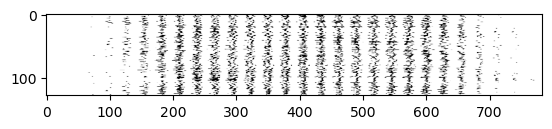

In [4]:
# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

In [5]:
import time 

loss_fn = nn.CrossEntropyLoss()

def one_hot_encoding(label_batch):

  represent_label = torch.arange(0, 10).to(device)
  labels_one_hot = torch.empty(0,10).to(device)

  for label in label_batch:
    temp_labels_one_hot = (represent_label==label)
    temp_labels_one_hot = torch.reshape(temp_labels_one_hot, (1, 10))

    labels_one_hot = torch.cat([labels_one_hot,temp_labels_one_hot])
  
  return labels_one_hot

def train_model(model, train_loader, device): 
    
    # define optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    
    # Define the training loop
    epochs= 5
    cost = []
    duration = []
    training_start_time = time.time()

    for epoch in range(epochs):
      t0 = time.time()
      
      total_loss=0

      for i, batch in enumerate(train_loader):

        X, Y = batch

        X = X.to(device)
        Y = Y.to(device)

        yhat = model(X)

        Y = one_hot_encoding(Y)

        loss = loss_fn(yhat, Y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # get total loss 
        total_loss+=loss.item() 
      
      print(f"Epoch {epoch}\t" + f"Loss: {total_loss}\t" + f"Time: {time.time() - t0}")

      cost.append(total_loss)

    print(f"Overall time taken: {time.time() - training_start_time}s")
    
    return cost

def plot_cost(*costs):
    
    # plot the cost(s)
    for model_cost in costs: 
        plt.plot(model_cost)
    
    plt.xlabel('epochs')
    plt.title('cross entropy loss')
    plt.legend(["Shallow", "Deep", "Deeper"])
    plt.show()

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.is_available()

False

In [7]:
model_shallow = ShallowNN(784, 128, 10).to(device)
model_deep = DeepNN(784, 128, 64, 10).to(device)
model_deeper = DeeperNN(784, 256, 128, 64, 64, 32, 10).to(device)

In [8]:
cost_shallow = train_model(model_shallow,train_loader, device)
cost_deep = train_model(model_deep,train_loader, device)
cost_deeper = train_model(model_deeper,train_loader,device)

Epoch 0	Loss: 276.3276252299547	Time: 7.804157972335815
Epoch 1	Loss: 142.42770013213158	Time: 7.558715105056763
Epoch 2	Loss: 122.60437067598104	Time: 7.508359909057617
Epoch 3	Loss: 108.31255961954594	Time: 7.513999938964844
Epoch 4	Loss: 96.60641394555569	Time: 7.805928945541382
Overall time taken: 38.19238877296448s
Epoch 0	Loss: 338.59256272017956	Time: 8.248214960098267
Epoch 1	Loss: 127.33786395937204	Time: 8.594353199005127
Epoch 2	Loss: 96.72587259113789	Time: 8.943317890167236
Epoch 3	Loss: 76.9382243603468	Time: 10.827955961227417
Epoch 4	Loss: 63.66309699602425	Time: 14.309651851654053
Overall time taken: 50.92409086227417s
Epoch 0	Loss: 1003.8253751993179	Time: 15.034890174865723
Epoch 1	Loss: 652.362616121769	Time: 14.670042037963867
Epoch 2	Loss: 367.11761090159416	Time: 12.637521028518677
Epoch 3	Loss: 299.76552522182465	Time: 11.204296827316284
Epoch 4	Loss: 201.48518084734678	Time: 10.775702953338623
Overall time taken: 64.32303309440613s


In [10]:
torch.save(model_shallow, 'shallow_high_perform1.pt')
torch.save(model_deep, 'deep_high_perform1.pt')
torch.save(model_deeper, 'deeper_high_perform1.pt')

### 1.3 Visualize the training loss vs epoch for all shallow vs deep networks

In the figures below, I've played around with the number of neurons in each hidden layers for all of my networks defined earlier, to give you a variety of output.  

You should try to output at least a single figure as below. Better to compare to vary the architecture of the networks to show what is working and what isn't working ('working' defined as in deeper networks outperforms shallow networks).Hopefully the loss went down as the models learned!


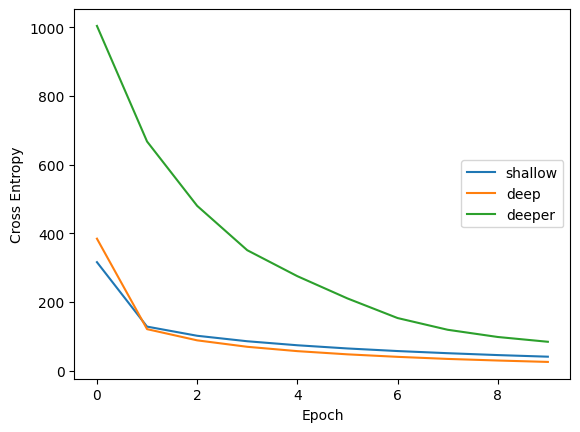

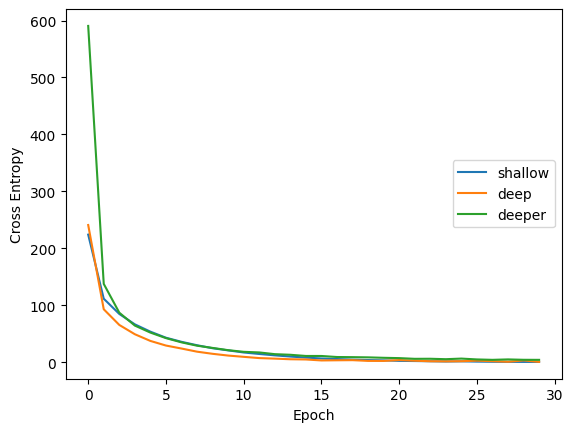

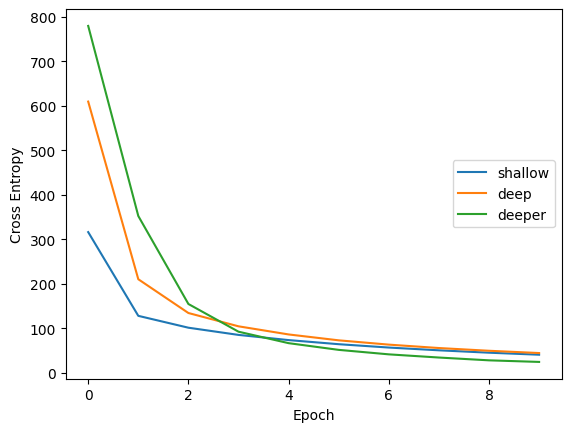

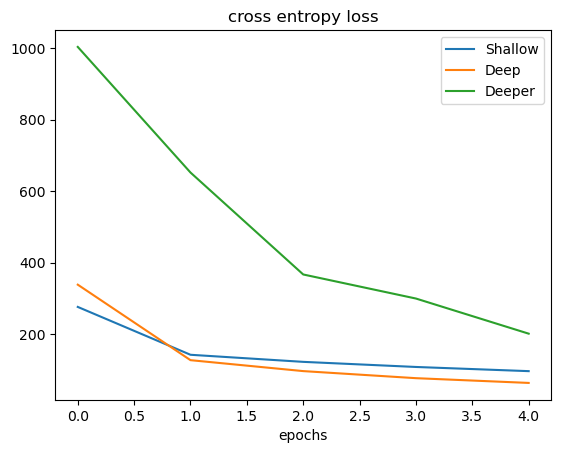

In [9]:
plot_cost(cost_shallow, cost_deep, cost_deeper)

### 1.4 Evaluation of trained model on trained data

Previously we've computed the loss vs epoch. But now we want to evaluate the trained models and their predictions against the training and test dataset. Hence we would need to compute the overall accuracy of the training and test set. Note you need to make a call to model.eval() - this sets the model into evaluation mode and supresses non-training things (gradients, and things such as dropout being applied/computed).

Some samples of the output are given below.


```
print('----Model Shallow-----\n')
evaluate_model(model_shallow,train_loader,test_loader)

print('\n----Model Deep-----')
evaluate_model(model_deep,train_loader,test_loader)

print('\n----Model Deeper-----')
evaluate_model(model_deeper,train_loader,test_loader)
```

In [11]:
model_shallow = torch.load('shallow_high_perform1.pt')
model_deep = torch.load('deep_high_perform1.pt')
model_deeper = torch.load('deeper_high_perform1.pt')

In [12]:
def interpret_yhat(y_pred):
  finalized_yhat = torch.empty(0).to(device)

  for probability in y_pred:
    temp_yhat = torch.argmax(probability) # Take the highest probability as the prediction value
    temp_yhat = torch.reshape(temp_yhat, (1,1))

    finalized_yhat = torch.cat([finalized_yhat,temp_yhat])
  
  finalized_yhat = torch.flatten(finalized_yhat)

  return finalized_yhat


def iterate_loader(model, data_loader):
  
  false_result = 0
  true_result = 0

  for input_batch, target_batch in data_loader: #data_loader can take train or test dataset
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)

    y_pred = model(input_batch) # probability of each class
    y_pred = interpret_yhat(y_pred)

    temp_test_result = (y_pred == target_batch)

    true_count = len(temp_test_result.nonzero())
    false_count = len(input_batch) - true_count
    
    true_result += true_count
    false_result += false_count

  dataset_size = len(data_loader.dataset)

  print(f'Number of data: {dataset_size}')
  print(f'Number of wrongly predicted label: {false_result}')
  print(f'Accuracy: {(true_result / dataset_size) * 100}')


def evaluate_model(model,train_loader,test_loader):
  
  model.eval() # sets the model in evaluation mode 
  
  print('Training data')
  iterate_loader(model, train_loader)

  print('\nTest data')
  iterate_loader(model, test_loader)

# optimize using tensor operation

In [13]:
print('----Model Shallow-----\n')
evaluate_model(model_shallow,train_loader,test_loader)

print('\n----Model Deep-----')
evaluate_model(model_deep,train_loader,test_loader)

print('\n----Model Deeper-----')
evaluate_model(model_deeper,train_loader,test_loader)

----Model Shallow-----

Training data
Number of data: 60000
Number of wrongly predicted label: 3325
Accuracy: 94.45833333333333

Test data
Number of data: 10000
Number of wrongly predicted label: 565
Accuracy: 94.35

----Model Deep-----
Training data
Number of data: 60000
Number of wrongly predicted label: 2016
Accuracy: 96.64

Test data
Number of data: 10000
Number of wrongly predicted label: 371
Accuracy: 96.28999999999999

----Model Deeper-----
Training data
Number of data: 60000
Number of wrongly predicted label: 2961
Accuracy: 95.065

Test data
Number of data: 10000
Number of wrongly predicted label: 557
Accuracy: 94.43


# 2. Noisy inputs

In this assignment, we'll be adding noise to the original inputs and see how they affect the performance of the models. Obviously we are expecting the models (regardless shallow or deep networks) to perform relatively poor compared to the original dataset.

### 2.1 Add some noise to the original data and visualize a few of the images

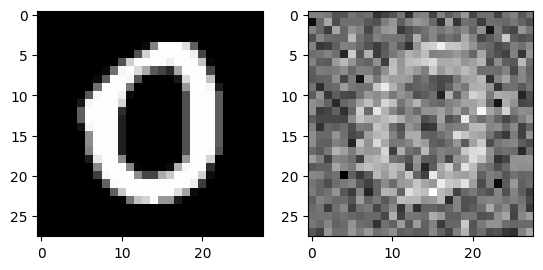

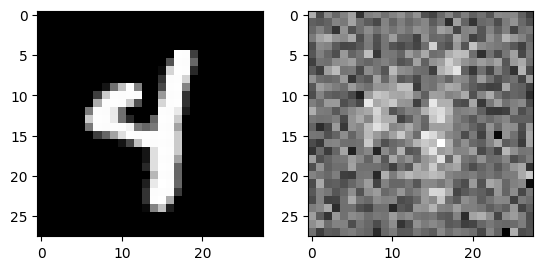

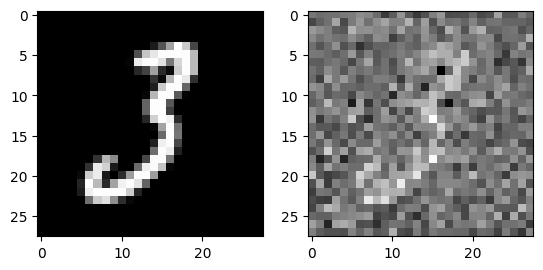

In [14]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [15]:
transformCustomNoise = transform.Compose([
    transform.ToTensor(),
    AddGaussianNoise(0., 0.3),
    transform.Lambda(lambda x:x.view(-1))
])

train_noise = datasets.MNIST(
    root='.',
    train=True,
    transform=transformCustomNoise, 
    download=True
    )
test = datasets.MNIST(
    root='.', 
    train=False, 
    transform=transformCustom,
    download=True
    )

In [16]:
# to ease displaying the comparison between noisy and original image, this is just dummy data loader, with batch size 1

kwargs = {'num_workers': 2, 'pin_memory': True, 'persistent_workers' : True} if torch.cuda.is_available() else {}
print(torch.cuda.is_available())
print(kwargs)

dummy_train_noise_loader = DataLoader(train_noise,shuffle=False, **kwargs)

False
{}


/Users/amirulasyraf/opt/miniconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


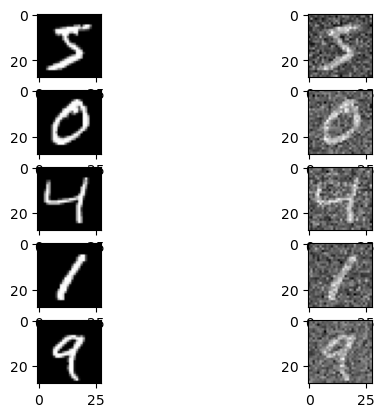

In [17]:
length = 5
width = 2

f, axarr = plt.subplots(length,width)

train_iter = iter(dummy_train_noise_loader)

for i in range(length):
  axarr[i,0].imshow(train.train_data[i], cmap=plt.get_cmap('gray'))

  noise_img, label = next(train_iter)
  axarr[i,1].imshow(noise_img.view(28, 28), cmap=plt.get_cmap('gray'))

### 2.2 Train some models on the noisy dataset

This stage is the same as the training on the original input. As you might have figured out by now, I'm adding noise to the input as we train instead of creating a noisy dataset first. But that is just me, you can do whatever style and approach you like.

```
model_shallow = ShallowNN(784,128, 10) #input_size,hidden_size,num_classes
model_deep = DeepNN(784,128,128,10) #input_size,hidden_size1,hidden_size2,num_classes
model_deeper = DeeperNN(784,512,312,256,7,784,10) 

training_shallow_loss_noisy =  training(model_shallow,train_loader,10,True)
training_deep_loss_noisy =  training(model_deep,train_loader,10,True)
training_deeper_loss_noisy =  training(model_deeper,train_loader,10,True)
```

In [18]:
batchSize = 128

kwargs = {'num_workers': 2, 'pin_memory': True, 'persistent_workers' : True} if torch.cuda.is_available() else {}
print(torch.cuda.is_available())
print(kwargs)

train_noise_loader = DataLoader(train_noise, batch_size=batchSize,shuffle=True, **kwargs)
test_loader = DataLoader(test,batch_size=batchSize, shuffle=False, **kwargs)

False
{}


In [19]:
noise_model_shallow = ShallowNN(784, 128, 10).to(device)
noise_model_deep = DeepNN(784, 128, 64, 10).to(device)
noise_model_deeper = DeeperNN(784, 256, 128, 64, 64, 32, 10).to(device)

In [20]:
cost_noise_shallow = train_model(noise_model_shallow,train_noise_loader, device)
cost_noise_deep = train_model(noise_model_deep,train_noise_loader, device)
cost_noise_deeper = train_model(noise_model_deeper,train_noise_loader,device)

Epoch 0	Loss: 307.46519696712494	Time: 10.382172107696533
Epoch 1	Loss: 174.34305089712143	Time: 10.5006582736969
Epoch 2	Loss: 157.37888142466545	Time: 9.23490309715271
Epoch 3	Loss: 142.95851369202137	Time: 9.474289178848267
Epoch 4	Loss: 128.17577812075615	Time: 9.622063159942627
Overall time taken: 49.214507818222046s
Epoch 0	Loss: 396.6755218207836	Time: 9.698387145996094
Epoch 1	Loss: 164.3732541948557	Time: 11.017812252044678
Epoch 2	Loss: 129.1379426419735	Time: 11.736135959625244
Epoch 3	Loss: 108.01920013129711	Time: 12.803185224533081
Epoch 4	Loss: 91.44032199680805	Time: 12.014616966247559
Overall time taken: 57.27060389518738s
Epoch 0	Loss: 811.6378208994865	Time: 12.51638913154602
Epoch 1	Loss: 240.2326218187809	Time: 12.134735822677612
Epoch 2	Loss: 152.1744034141302	Time: 11.581220149993896
Epoch 3	Loss: 113.83442416787148	Time: 11.619956016540527
Epoch 4	Loss: 95.78457974642515	Time: 11.764622688293457
Overall time taken: 59.6174430847168s


### 2.3 Visualization of the training loss for noisy input

In this visualization, I compared the performance of shallow vs deep networks for noisy data. And I also compared the performance of all models to see the effect of noisy and original data. 

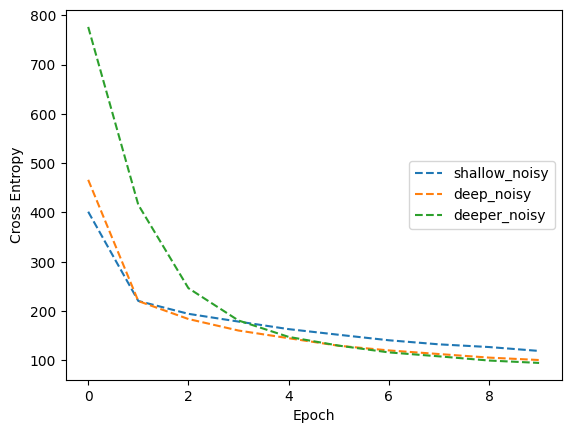

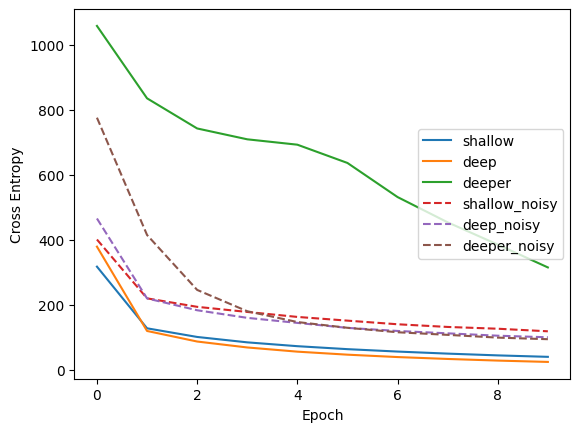

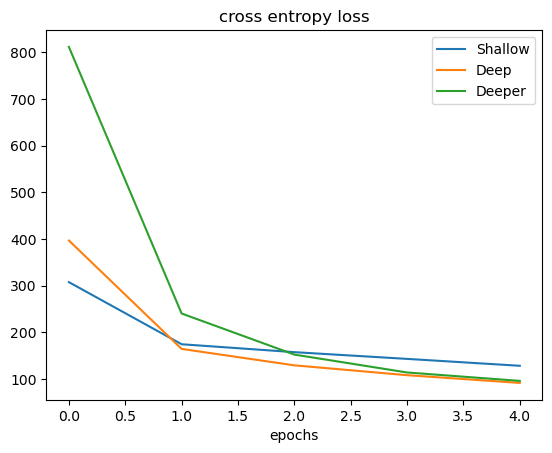

In [22]:
plot_cost(cost_noise_shallow, cost_noise_deep, cost_noise_deeper)

### 2.4 Evaluation against training and test dataset

This is also the same as Part 1. Only we expect the model accuracy to be poorer for noisy input compared to the original images.

In [24]:

print('----Model Shallow-----\n')
evaluate_model(noise_model_shallow,train_loader,test_loader)

print('\n----Model Deep-----')
evaluate_model(noise_model_deep,train_loader,test_loader)

print('\n----Model Deeper-----')
evaluate_model(noise_model_deeper,train_loader,test_loader)

----Model Shallow-----

Training data
Number of data: 60000
Number of wrongly predicted label: 3445
Accuracy: 94.25833333333333

Test data
Number of data: 10000
Number of wrongly predicted label: 583
Accuracy: 94.17

----Model Deep-----
Training data
Number of data: 60000
Number of wrongly predicted label: 2494
Accuracy: 95.84333333333333

Test data
Number of data: 10000
Number of wrongly predicted label: 418
Accuracy: 95.82000000000001

----Model Deeper-----
Training data
Number of data: 60000
Number of wrongly predicted label: 2104
Accuracy: 96.49333333333333

Test data
Number of data: 10000
Number of wrongly predicted label: 409
Accuracy: 95.91
